## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


/var/folders/4p/7qv47hkj16s6wsk000sgyl0r0000gn/T/ipykernel_86227/3370255843.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import the 20 news group dataset utilizing sklearn library
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train')

mydata_test =  fetch_20newsgroups(subset='test')


In [3]:
mydata_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [4]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [5]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

# Type : Bunch : Container object exposing keys as attributes. 
# They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [6]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [10]:
# Preprocessing the data

lines = []
word_list = []

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    words = [word.lower() for word in word_tokenize(line) if word.isalpha()]
    #print("words", words)
    lines.append(words)
    for word in words:
        if word not in word_list:
            word_list.append(word)
    


# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(text)

#Create a dictionary to keep track of index of each word
dict_idx = {}
for i, word in enumerate(word_list):
    dict_idx[word] = i

In [13]:
print(lines[:10])

[['from', 'lerxst', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'i', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'i', 'saw', 'the', 'other', 'day', 'it', 'was', 'a', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'a', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'i', 'know', 'if', 'anyone', 'can', 'tellme', 'a', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst'], ['from', 'guykuo', 'guy', 'kuo', 'subject', 'si', 'clock', 'p

In [14]:
print(word_list)

{'sufficiently', 'wall', 'chicogo', 'randy', 'wonk', 'galvez', 'mohandas', 'due', 'bobc', 'bjd', 'boh', 'unionist', 'hindered', 'mailstop', 'downgrade', 'jemartin', 'edgeways', 'sinkov', 'voucher', 'srand', 'friendships', 'carlj', 'dkfox', 'seems', 'matusevich', 'dmodem', 'mep', 'blaisec', 'petro', 'dykt', 'ketchup', 'clunk', 'katan', 'thundering', 'aguilera', 'mercury', 'dmorph', 'benched', 'blh', 'journey', 'starched', 'parade', 'explored', 'errant', 'brjgb', 'xmncolormap', 'ezmlru', 'conspires', 'bitplaned', 'legless', 'unheralded', 'irchzrli', 'temptation', 'jerseys', 'summers', 'htilney', 'vagina', 'zchnu', 'printz', 'reverberating', 'fictitiously', 'damien', 'denilen', 'stonewalling', 'pournelle', 'cull', 'desireable', 'univerisity', 'repaired', 'cui', 'blauser', 'weighting', 'schwimmer', 'shipman', 'amphotericin', 'conforter', 'meir', 'ajzlg', 'trillo', 'naah', 'fpl', 'interacting', 'oiz', 'anxietous', 'stelth', 'mdt', 'rang', 'refresher', 'compactness', 'gotti', 'mchamberland',

In [15]:
# Create a frequency dictionary

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word =  {}
    for word in word_list:
        freq_word[word] = 0
    for line in lines:
        for word in line:
            freq_word[word]+= 1
    return freq_word

In [16]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'sufficiently': 38,
 'wall': 160,
 'chicogo': 25,
 'randy': 167,
 'wonk': 1,
 'galvez': 1,
 'mohandas': 1,
 'due': 458,
 'bobc': 8,
 'bjd': 1,
 'boh': 1,
 'unionist': 3,
 'hindered': 5,
 'mailstop': 7,
 'downgrade': 2,
 'jemartin': 3,
 'edgeways': 2,
 'sinkov': 4,
 'voucher': 7,
 'srand': 1,
 'friendships': 1,
 'carlj': 2,
 'dkfox': 1,
 'seems': 1297,
 'matusevich': 6,
 'dmodem': 2,
 'mep': 6,
 'blaisec': 5,
 'petro': 12,
 'dykt': 1,
 'ketchup': 1,
 'clunk': 2,
 'katan': 1,
 'thundering': 3,
 'aguilera': 1,
 'mercury': 64,
 'dmorph': 4,
 'benched': 6,
 'blh': 11,
 'journey': 20,
 'starched': 1,
 'parade': 7,
 'explored': 6,
 'errant': 5,
 'brjgb': 1,
 'xmncolormap': 1,
 'ezmlru': 1,
 'conspires': 1,
 'bitplaned': 2,
 'legless': 1,
 'unheralded': 2,
 'irchzrli': 1,
 'temptation': 13,
 'jerseys': 5,
 'summers': 3,
 'htilney': 1,
 'vagina': 23,
 'zchnu': 1,
 'printz': 1,
 'reverberating': 1,
 'fictitiously': 1,
 'damien': 6,
 'denilen': 1,
 'stonewalling': 8,
 'pournelle': 3,
 'cull': 2,

In [17]:
# Create a function to calculate the Term Frequency

# Term frequency measures the frequently of a term that appears in a document.
def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    # Calculating the length of the list containing the entire corpus
    n = len(document)
    # Calculating the number of time the word occurs in the document
    occur = len([token for token in document if token == word ])
    # Calculating the term frequency
    tf = occur/n
    return tf

In [18]:
# Create a function to calculate the Inverse Document Frequency

def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try:
        word_occur = freq_word[word] + 1
    except:
        word_occur = 1
    # Calculating the inverse document frequency for each word present in the document
    idf = np.log(total_docs / word_occur)

    return idf

In [25]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(lines):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in lines:
        tf = term_frequency(lines, word)
        idf = inverse_df(word)
        tf_idf_vec[dict_idx[word]] = tf * idf

    return tf_idf_vec

In [26]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

computed_vectors = []
for line in lines:
    computed_vectors.append(tfidf(line ))

In [30]:
print(computed_vectors[0])

[0. 0. 0. ... 0. 0. 0.]


## Multinomial Naive Bayes (10 Points)

In [37]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB

X_train = mydata_train.data
y_train = mydata_train.target

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [38]:
#Perform testing on the train dataset

X_test = mydata_test.data
y_test = mydata_test.target

X_test_tfidf = tfidf.transform(X_test)

pred = model.predict(X_test_tfidf)

In [40]:
#Calculate the F1 Score and the Accuracy
from sklearn.metrics import accuracy_score, f1_score

F1_score = f1_score(y_test, pred, average='weighted')
Accuracy = accuracy_score(y_test, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.7684457156894656
Accuracy:  0.7738980350504514


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [11]:
# # install libraries
# ! pip install wikipedia
# import wikipedia

import wikipedia
from wikipedia.exceptions import WikipediaException

In [14]:
'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Northeastern Unversity", "Harvard University", "Boston University", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football", "Mathematics", "Science", "History"]

# list of articles to be downloaded
articles = []
for topic in topics:
    topic_results = wikipedia.search(topic)
    selected_articles = topic_results[:4]
    articles.extend(selected_articles)
print(articles)

# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        summary = wikipedia.summary(article)
        data.append((article, summary))
    except Exception as e:
        data.append((article, f"Error occurred: {e}"))

for title, summary in data:
    print(f"{title}: {summary[:500]}...")  

['Northeastern University', 'Harvard University', 'President of Harvard University', 'List of Harvard University people', 'Harvard University Press', 'Boston University', 'Boston', 'Boston University Terriers', 'University of Massachusetts Boston', 'Natural language processing', 'Natural language', 'Outline of natural language processing', 'Natural Language Toolkit', 'Machine learning', 'Quantum machine learning', 'Transformer (machine learning model)', 'Boosting (machine learning)', 'Quantum machine learning', 'Machine learning', 'Active learning (machine learning)', 'Machine learning in physics', 'Artificial intelligence', 'Generative artificial intelligence', 'Artificial general intelligence', 'A.I. Artificial Intelligence', 'Data science', 'Data', 'Data (computer science)', 'Data analysis', 'Master in Data Science', "List of master's degrees", 'Master of Library and Information Science', 'Master of Science in Information Technology', 'Bank of America', 'Bank of America Stadium', 'B

/Users/paarthvisharma/Documents/Spring 2024/NLP/NLP/Assignment 2/nlp2/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/paarthvisharma/Documents/Spring 2024/NLP/NLP/Assignment 2/nlp2/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Northeastern University: Error occurred: Page id "northwestern university" does not match any pages. Try another id!...
Harvard University: Harvard University is a private Ivy League research university in Cambridge, Massachusetts. Founded in 1636 as Harvard College and named for its first benefactor, the Puritan clergyman John Harvard, it is the oldest institution of higher learning in the United States.
Its influence, wealth, and rankings have made it one of the most prestigious universities in the world.Harvard's founding was authorized by the Massachusetts colonial legislature, "dreading to leave an illiterate ministry to the ch...
President of Harvard University: The president of Harvard University is the chief administrator of Harvard University and the ex officio president of the Harvard Corporation. Each is appointed by and is responsible to the other members of that body, who delegate to the president the day-to-day running of the university.
Harvard's current interim presiden

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

In [30]:
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stopwords = stopwords.words('english')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# You can use Assignment 1's clean message function

def clean_message(message):
    processed_data = []
    lemmatizer = WordNetLemmatizer()
    # Iterating through the words and respective categories in doctumenst
    for category, words in message:
        print(words)
    # Using the word tokentizer library from nltk to create tokens
        token_data = word_tokenize(" ".join(words))
        
    # Removing the stop words
        # filtered_token_data = [token.lower() for token in token_data if token.lower() not in stopwords]
        filtered_token_data = [token.lower() for token in token_data if token.isalpha() and token.lower() not in stopwords]

    # Lemmatization
        lemmatized_token_data = [lemmatizer.lemmatize(token) for token in filtered_token_data]

    # Appending the processed output with categories
        processed_data.append((lemmatized_token_data, category))
    return processed_data


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text



In [38]:
message = data
cleaned_message = clean_message(message)
print(cleaned_message)

Error occurred: Page id "northwestern university" does not match any pages. Try another id!
Harvard University is a private Ivy League research university in Cambridge, Massachusetts. Founded in 1636 as Harvard College and named for its first benefactor, the Puritan clergyman John Harvard, it is the oldest institution of higher learning in the United States.
Its influence, wealth, and rankings have made it one of the most prestigious universities in the world.Harvard's founding was authorized by the Massachusetts colonial legislature, "dreading to leave an illiterate ministry to the churches", though never formally affiliated with any denomination, in its early years Harvard College primarily trained Congregational clergy. Its curriculum and student body were gradually secularized during the 18th century. By the 19th century, Harvard emerged as the most prominent academic and cultural institution among the Boston elite. Following the American Civil War, under President Charles William 

In [ ]:
print("Preprocessed Words:", processed_data[0][0])
print("Category:", processed_data[0][1])

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import


In [ ]:
print(X.shape)

### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data


Plot and annotate the points with different markers for different expected groups.

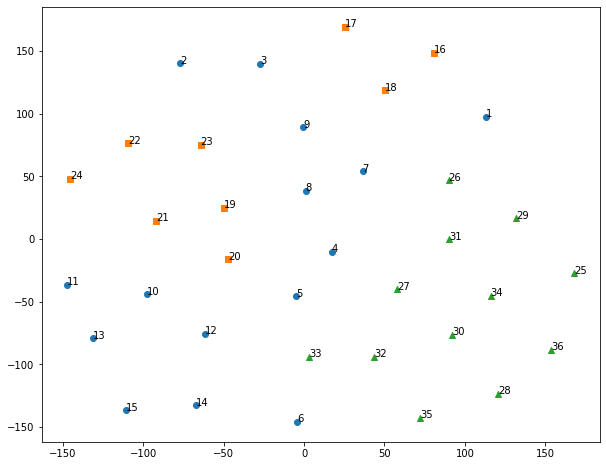

In [ ]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))



**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [27]:
# Import the train.txt and val.txt file into pandas dataframe format
import pandas as pd
import os
def import_data(filename):
    lines = []
    labels = []
    with open(filename, "r", encoding='utf-8') as file:
        for i in file:
            # print(i)
            line, label = i.strip().split(';')
            lines.append(line)
            labels.append(label)
    return pd.DataFrame({'Sentence': lines, 'Label': labels})

# train
df_train = import_data("train-1.txt")

# validation
df_val = import_data("val-1.txt")
# and printout the train.shape and validation.shape
print("Train shape" , df_train.shape)
print("Validation shape" , df_val.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

Train shape (16000, 2)
Validation shape (2000, 2)


In [28]:
# clean the text in the train and validation dataframes using the clean_text function provided above
df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_val['Sentence'] = df_val['Sentence'].apply(clean_text)
print(df_train.head())

                                            Sentence    Label
0                              didnt feel humiliated  sadness
1  go feeling hopeless damned hopeful around some...  sadness
2          im grabbing minute post feel greedy wrong    anger
3  ever feeling nostalgic fireplace know still pr...     love
4                                    feeling grouchy    anger


In [29]:
X_train = df_train['Sentence']
y_train = df_train['Label']

X_val = df_val['Sentence']
y_val = df_val['Label']

In [30]:
# initialise count vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset
tf = CountVectorizer()
X_train_tf = tf.fit_transform(X_train)
X_val_tf = tf.transform(X_val)

In [31]:
# initialise tfidf vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [9]:
# initialise label encoder from sklearn module

# fit on train labels and transform both train and validation labels
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

y_train_encoded = labelEncoder.fit_transform(y_train)
y_val_encoded = labelEncoder.transform(y_val)

In [34]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder

# oneHotEncoder = OneHotEncoder()

# y_train_onehot = oneHotEncoder.fit_transform(y_train.values.reshape(-1, 1))
# y_val_onehot = oneHotEncoder.transform(y_train.values.reshape(-1, 1))

import numpy as np

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()

# The input to OneHotEncoder should be 2D, so we reshape our label arrays
y_train_reshaped = y_train_encoded.reshape(-1, 1)
y_val_reshaped = y_val_encoded.reshape(-1, 1)

# Fit the encoder on the training labels and transform them
y_train_onehot = onehot_encoder.fit_transform(y_train_reshaped).toarray()

# Transform the validation labels
y_val_onehot = onehot_encoder.transform(y_val_reshaped).toarray()

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [35]:
y_train_unique = set(y_train)
print(y_train_unique)

{'anger', 'sadness', 'joy', 'surprise', 'love', 'fear'}


In [36]:
y_val_unique = set(y_val)
print(y_val_unique)

{'anger', 'surprise', 'joy', 'sadness', 'love', 'fear'}


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
  classes = 6

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
  x = tf.keras.layers.Dense(2048, activation = 'relu')(inp)
  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(1024, activation = 'tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 9 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 11 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  # layer 12 : output layer with units equal to number of classes and activation as softmax
  output = tf.keras.layers.Dense(classes, activation='softmax')(x)
  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
  model = models.Model(inputs=inp, outputs=output)
  model.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['AUC', 'Precision', 'Recall', 'Accuracy'])

  return model


In [39]:
# call the build_model function and initialize the model
# X_train_dense = X_train_tf.toarray()
# X_val_dense = X_val_tf.toarray()

model = build_model(X_train_tf)


In [40]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

# Train the model
history = model.fit(X_train_tf.toarray(), y_train_onehot, 
                    epochs=10, 
                    batch_size=8, 
                    validation_data=(X_val_tf.toarray(), y_val_onehot))



Epoch 1/10
2000/2000 [==============================] - 188s 94ms/step - loss: 2.3577 - auc: 0.7884 - precision: 0.5475 - recall: 0.1304 - Accuracy: 0.3961 - val_loss: 1.3459 - val_auc: 0.8705 - val_precision: 0.6755 - val_recall: 0.3425 - val_Accuracy: 0.5050
Epoch 2/10
2000/2000 [==============================] - 189s 94ms/step - loss: 1.3336 - auc: 0.8813 - precision: 0.7033 - recall: 0.4090 - Accuracy: 0.5969 - val_loss: 1.2664 - val_auc: 0.9001 - val_precision: 0.7380 - val_recall: 0.5635 - val_Accuracy: 0.6740
Epoch 3/10
2000/2000 [==============================] - 190s 95ms/step - loss: 1.2332 - auc: 0.9046 - precision: 0.7336 - recall: 0.5477 - Accuracy: 0.6627 - val_loss: 1.2351 - val_auc: 0.9052 - val_precision: 0.7452 - val_recall: 0.5630 - val_Accuracy: 0.6900
Epoch 4/10
2000/2000 [==============================] - 229s 114ms/step - loss: 1.1772 - auc: 0.9144 - precision: 0.7510 - recall: 0.5920 - Accuracy: 0.6883 - val_loss: 1.2015 - val_auc: 0.9145 - val_precision: 0.7667

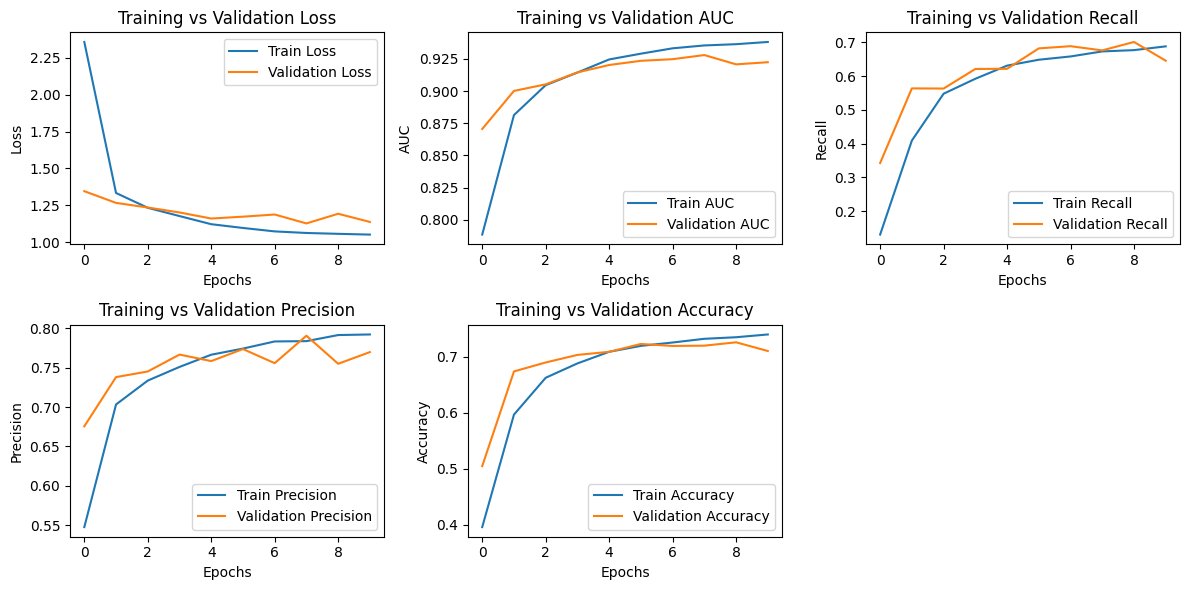

In [43]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# AUC Plot
plt.subplot(2, 3, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Recall Plot
plt.subplot(2, 3, 3)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Precision Plot
plt.subplot(2, 3, 4)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Training vs Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Accuracy Plot
plt.subplot(2, 3, 5)
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
# again call the build_model function and initialize the model

model_tfidf = build_model(X_train_tfidf)

In [50]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)


def convert_to_sparse_tensor(sparse_matrix):
    sparse_matrix = sparse_matrix.tocoo()
    indices = np.mat([sparse_matrix.row, sparse_matrix.col]).transpose()
    return tf.SparseTensor(indices, sparse_matrix.data, sparse_matrix.shape)

# Convert the scipy sparse matrices to TensorFlow SparseTensors
X_train_tfidf_sparse = convert_to_sparse_tensor(X_train_tfidf)
X_val_tfidf_sparse = convert_to_sparse_tensor(X_val_tfidf)

# Reorder the indices of the SparseTensors
X_train_tfidf_reordered = tf.sparse.reorder(X_train_tfidf_sparse)
X_val_tfidf_reordered = tf.sparse.reorder(X_val_tfidf_sparse)

# Train the model with the reordered data
history = model_tfidf.fit(
    X_train_tfidf_reordered, y_train_onehot,
    epochs=10,
    batch_size=8,
    validation_data=(X_val_tfidf_reordered, y_val_onehot)
)

Epoch 1/10
2000/2000 [==============================] - 90s 45ms/step - loss: 1.9476 - auc: 0.7913 - precision: 0.5768 - recall: 0.1247 - Accuracy: 0.3966 - val_loss: 1.3379 - val_auc: 0.8723 - val_precision: 0.7484 - val_recall: 0.2975 - val_Accuracy: 0.5520
Epoch 2/10
2000/2000 [==============================] - 90s 45ms/step - loss: 1.2964 - auc: 0.8846 - precision: 0.7064 - recall: 0.4066 - Accuracy: 0.5863 - val_loss: 1.2411 - val_auc: 0.9012 - val_precision: 0.7055 - val_recall: 0.5415 - val_Accuracy: 0.6245
Epoch 3/10
2000/2000 [==============================] - 89s 44ms/step - loss: 1.1816 - auc: 0.9099 - precision: 0.7357 - recall: 0.5470 - Accuracy: 0.6540 - val_loss: 1.1686 - val_auc: 0.9131 - val_precision: 0.7419 - val_recall: 0.5705 - val_Accuracy: 0.6725
Epoch 4/10
2000/2000 [==============================] - 91s 45ms/step - loss: 1.1337 - auc: 0.9202 - precision: 0.7512 - recall: 0.5932 - Accuracy: 0.6884 - val_loss: 1.2353 - val_auc: 0.9033 - val_precision: 0.7064 - va

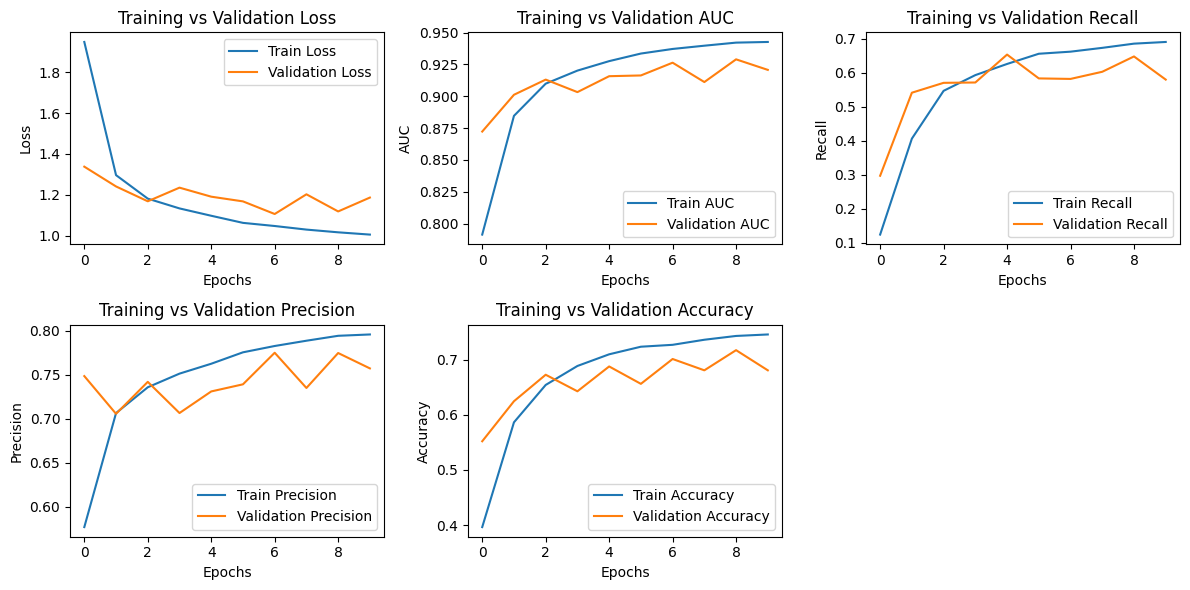

In [51]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# AUC Plot
plt.subplot(2, 3, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Recall Plot
plt.subplot(2, 3, 3)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Precision Plot
plt.subplot(2, 3, 4)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Training vs Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Accuracy Plot
plt.subplot(2, 3, 5)
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**